<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузите-данные-и-подготовьте-их-к-анализу" data-toc-modified-id="Загрузите-данные-и-подготовьте-их-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузите данные и подготовьте их к анализу</a></span></li><li><span><a href="#Задайте-функции-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии" data-toc-modified-id="Задайте-функции-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии</a></span></li><li><span><a href="#Проведите-исследовательский-анализ-данных" data-toc-modified-id="Проведите-исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проведите исследовательский анализ данных</a></span></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span></li><li><span><a href="#Проанализируйте-окупаемость-рекламы-c-помощью-графиков-LTV-и-ROI,-а-также-графики-динамики-LTV,-CAC-и-ROI." data-toc-modified-id="Проанализируйте-окупаемость-рекламы-c-помощью-графиков-LTV-и-ROI,-а-также-графики-динамики-LTV,-CAC-и-ROI.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.</a></span></li><li><span><a href="#Напишите-выводы" data-toc-modified-id="Напишите-выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Напишите выводы</a></span></li></ul></div>

Анализ вложений в рекламу развлекательного приложения Procrastinate Pro+.

        
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

**Цель исследования:**\
    Разобраться в причинах и помочь компании выйти в плюс.

Данные для анализа содержат:\
Информацию о пользователях привлечённых с 1 мая по 27 октября 2019 года\
Лог сервера с данными об их посещениях\
Выгрузка покупок за этот период\
Рекламные расходы

**Ход исследования:**\
Загрузка и подготовка к анализу данных\
Составление функций для расчетов и построения графиков\
Исследователский анализ данных\
Маркетинг\
Оценка окупаемости рекламы\
Вывод

## Загрузите данные и подготовьте их к анализу
Положите данные о визитах, заказах и рекламных тратах в переменные.
Подготовьте данные к анализу. Убедитесь, что тип данных во всех колонках соответствует значениям. Проверьте отсутствие дубликатов.

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

In [3]:
#напишем функию для представления информации о файлах
def dasets_info(df):
    return display(df.head(5)),\
    display(df.info()),\
    display('Количество пропусков:'),\
    display(df.isna().sum()),\
    display(f'Количество дубликатов: {df.duplicated().sum()}')

In [4]:
#выведем информацию о файлах
dasets_info(visits)
dasets_info(orders)
dasets_info(costs)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

'Количество пропусков:'

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

'Количество дубликатов: 0'

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

'Количество пропусков:'

User Id     0
Event Dt    0
Revenue     0
dtype: int64

'Количество дубликатов: 0'

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

'Количество пропусков:'

dt         0
Channel    0
costs      0
dtype: int64

'Количество дубликатов: 0'

(None, None, None, None, None)

Во всех трёх таблицах необходимо поменять тип данных с object на datetime в колонках относящихся к значению времени. Пропусков данных нет, дубликатов нет. Название колонок так же нужно превести к единообразию.
_________________

In [5]:
#изменяем название колонок
visits.columns =[col.lower().replace(' ', '_') for col in visits.columns]
orders.columns = [col.lower().replace(' ', '_') for col in orders.columns]
costs.columns = [col.lower().replace(' ', '_') for col in costs.columns]

In [6]:
display(visits.columns)
display(orders.columns)
costs.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

In [7]:
#меняем тип данных с object на datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [8]:
display(visits.info())
display(orders.info())
display(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Были приведены к единообразию название столбцов и изменён тип данных.

## Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [9]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [10]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [11]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [12]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [13]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [14]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [15]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [16]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Проведите исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [17]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, None,costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [18]:
# минимальная и максимальная даты привлечения пользователей.
min_data = profiles['dt'].min()
max_data = profiles['dt'].max()
print(f'Минимальная дата {min_data} и максимальная дата {max_data}.')

Минимальная дата 2019-05-01 и максимальная дата 2019-10-27.


**Вывод: После применения функции профиля, получена таблица профилей пользователй за период с 01.05.2019 по 27.10.2019.**
____

In [19]:
# количество пользователей и долю платящих из каждой страны
countries_users = profiles.groupby('region').agg(
    {'user_id': 'count', 'payer': 'sum'}).sort_values(by = 'payer', ascending=False)
countries_users['payers_share_%'] = round(countries_users['payer'] / countries_users['user_id'] *100,2)
countries_users

,user_id,payer,payers_share_%
region,,,
United States,100002,6902,6.90
UK,17575,700,3.98
France,17450,663,3.80
Germany,14981,616,4.11


**Вывод: Общее количество пользователей и доля платящих пользователей выше в Соединенных штатах. В остальных странах доли примерно одинаковые.**
___

In [20]:
# количество пользователей и долю платящих для каждого устройства
device_users = profiles.groupby('device').agg(
    {'user_id': 'nunique', 'payer': 'sum'}).sort_values(by = 'payer', ascending=False)
device_users['payers_share_%'] = round(device_users['payer'] / device_users['user_id'] * 100,2)
device_users

,user_id,payer,payers_share_%
device,,,
iPhone,54479,3382,6.21
Android,35032,2050,5.85
Mac,30042,1912,6.36
PC,30455,1537,5.05


**Вывод: По устройствам доля платящих пользователей примерно одинаковая, однако по общему числу пользователей выделяется iPhone.**
___

In [21]:
# количество пользователей и доля платящих для каждого канала привлечения
channel_users = profiles.groupby('channel').agg(
    {'user_id': 'nunique', 'payer': 'sum'}).sort_values(by = 'payer', ascending=False)
channel_users['payers_share_%'] = round(channel_users['payer'] / channel_users['user_id'] * 100,2)
channel_users

,user_id,payer,payers_share_%
channel,,,
FaceBoom,29144,3557,12.20
TipTop,19561,1878,9.60
organic,56439,1160,2.06
WahooNetBanner,8553,453,5.30
AdNonSense,3880,440,11.34
RocketSuperAds,4448,352,7.91
LeapBob,8553,262,3.06
OppleCreativeMedia,8605,233,2.71
lambdaMediaAds,2149,225,10.47


**Вывод: Наибольшая доля полатящих пользователей пришла из канала привлечения FaceBoom.**
___

Общий вывод: Проведя исследовательский анализ данных, консолидируюя полученную информацию можно составить портрет пользователей. Из полученных данных за период с 01.05.2019 по 27.10.2019 следует, что основная доля всех пользователей и платящих пользователей находится в США.
Среди пользователей приобладет использование платформ Mac и IPhone, так же на этих платформах высока доля платящих пользователей. Из каналов привлечения по общему колиству пользователей преобладает organic. Из платных каналов привлечения FaceBoom, так же у него самый высокий процент платящих пользователей.

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [22]:
# общая сумма расходов на маркетинг
print(f'Сумма расходов на маркетинг: ${costs.costs.sum().astype("int")}')

Сумма расходов на маркетинг: $105497


In [23]:
# распределение трат по источникам
ads_sourse = costs.groupby('channel').agg(
    {'costs': 'sum'}).sort_values(by = 'costs', ascending=False)
ads_sourse['percent'] = round(ads_sourse['costs'] / ads_sourse['costs'].sum() * 100 , 2)
ads_sourse

,costs,percent
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


**Вывод: На канал привлечения TipTop тратиться чуть более половины расходов на маркетинг однако этот канал является лишь вторым по доле привлечения платящих пользователей.**
___

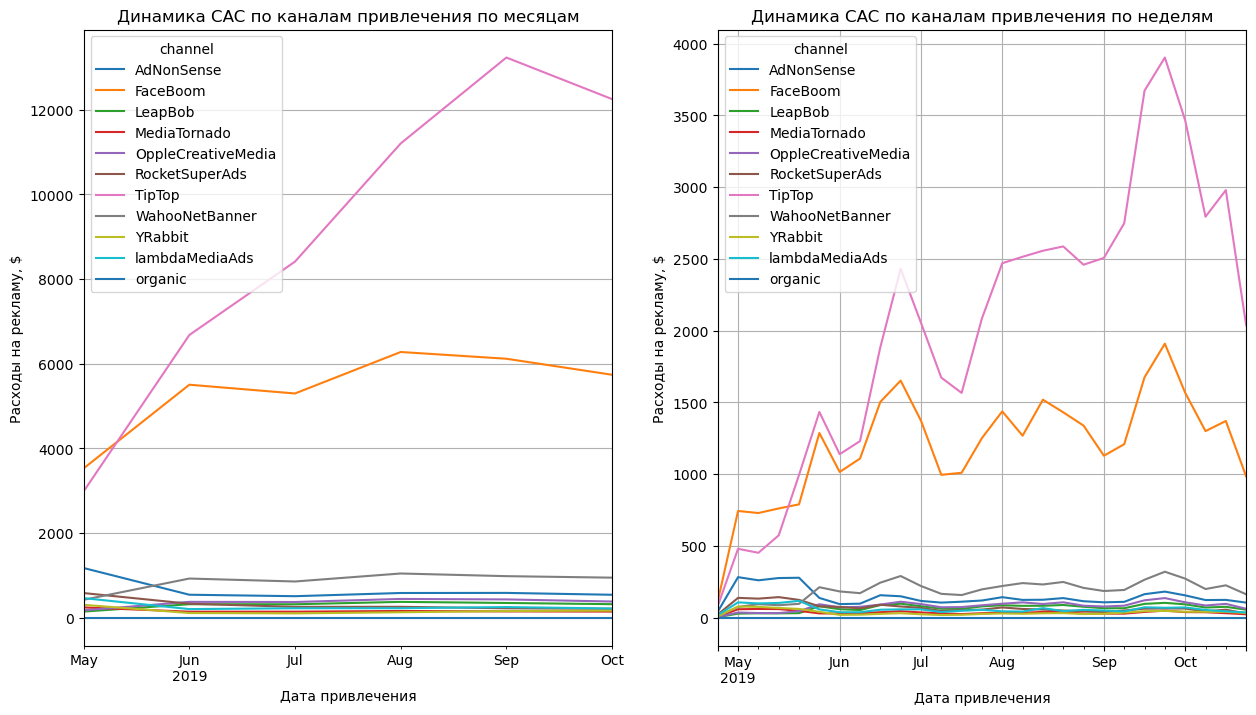

In [24]:
# визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику
profiles['week'] = profiles['dt'].astype('datetime64[W]')

profiles.pivot_table(
    index='month', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, figsize=(20, 6), ax = plt.subplot(1, 2, 1))
plt.ylabel('Расходы на рекламу, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика CAC по каналам привлечения по месяцам')


profiles.pivot_table(
    index='week', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, figsize=(15, 8), ax = plt.subplot(1, 2, 2))
plt.ylabel('Расходы на рекламу, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика CAC по каналам привлечения по неделям')
plt.show()

**Вывод: На графиках выделяются два канала привлечения  с наибольшими расходами на рекламу TipTop и FaceBoom. На графике с разбивкой по неделям хорошо видно схожесть динами трат у обоих этих двух каналов. Остальные каналы привлечения имеющие меньшие затраты так же обладают схожей между собой динамикой трат.**
___

In [25]:
# средняя стоимость привлечения одного пользователя.
acq_cost = profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost',
                                                                                     ascending = False)
acq_cost = acq_cost.query('acquisition_cost > 0')
acq_cost['acquisition_cost'] = round(acq_cost['acquisition_cost'], 2)
acq_cost

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


**Вывод:Канал обладающий самыми высокими маркетинговыми затратами TipTop обладает и самой высокой средней стоимостью привлечения одного пользователя.**
___

In [26]:
print('Средний САС: ', \
      round(profiles.query('acquisition_cost > 0')['acquisition_cost'].sum()\
            /profiles.query('acquisition_cost > 0')\
            ['acquisition_cost'].count(), 2), '$')

Средний САС:  1.13 $


Общий вывод: В ходе анализа маркотенговых затрат был определен бюджет на рекламу $105497.

Из этого бюджета чуть более 50 процентов приходится на канал привлечения TipTop. Однако исходя из анализа маркетенговых затрат видно, что затраты на привлечения одного пользователя по этому каналу ($2.8)
превышают средние затраты по всем каналам привлечения
($ 1.13).

## Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

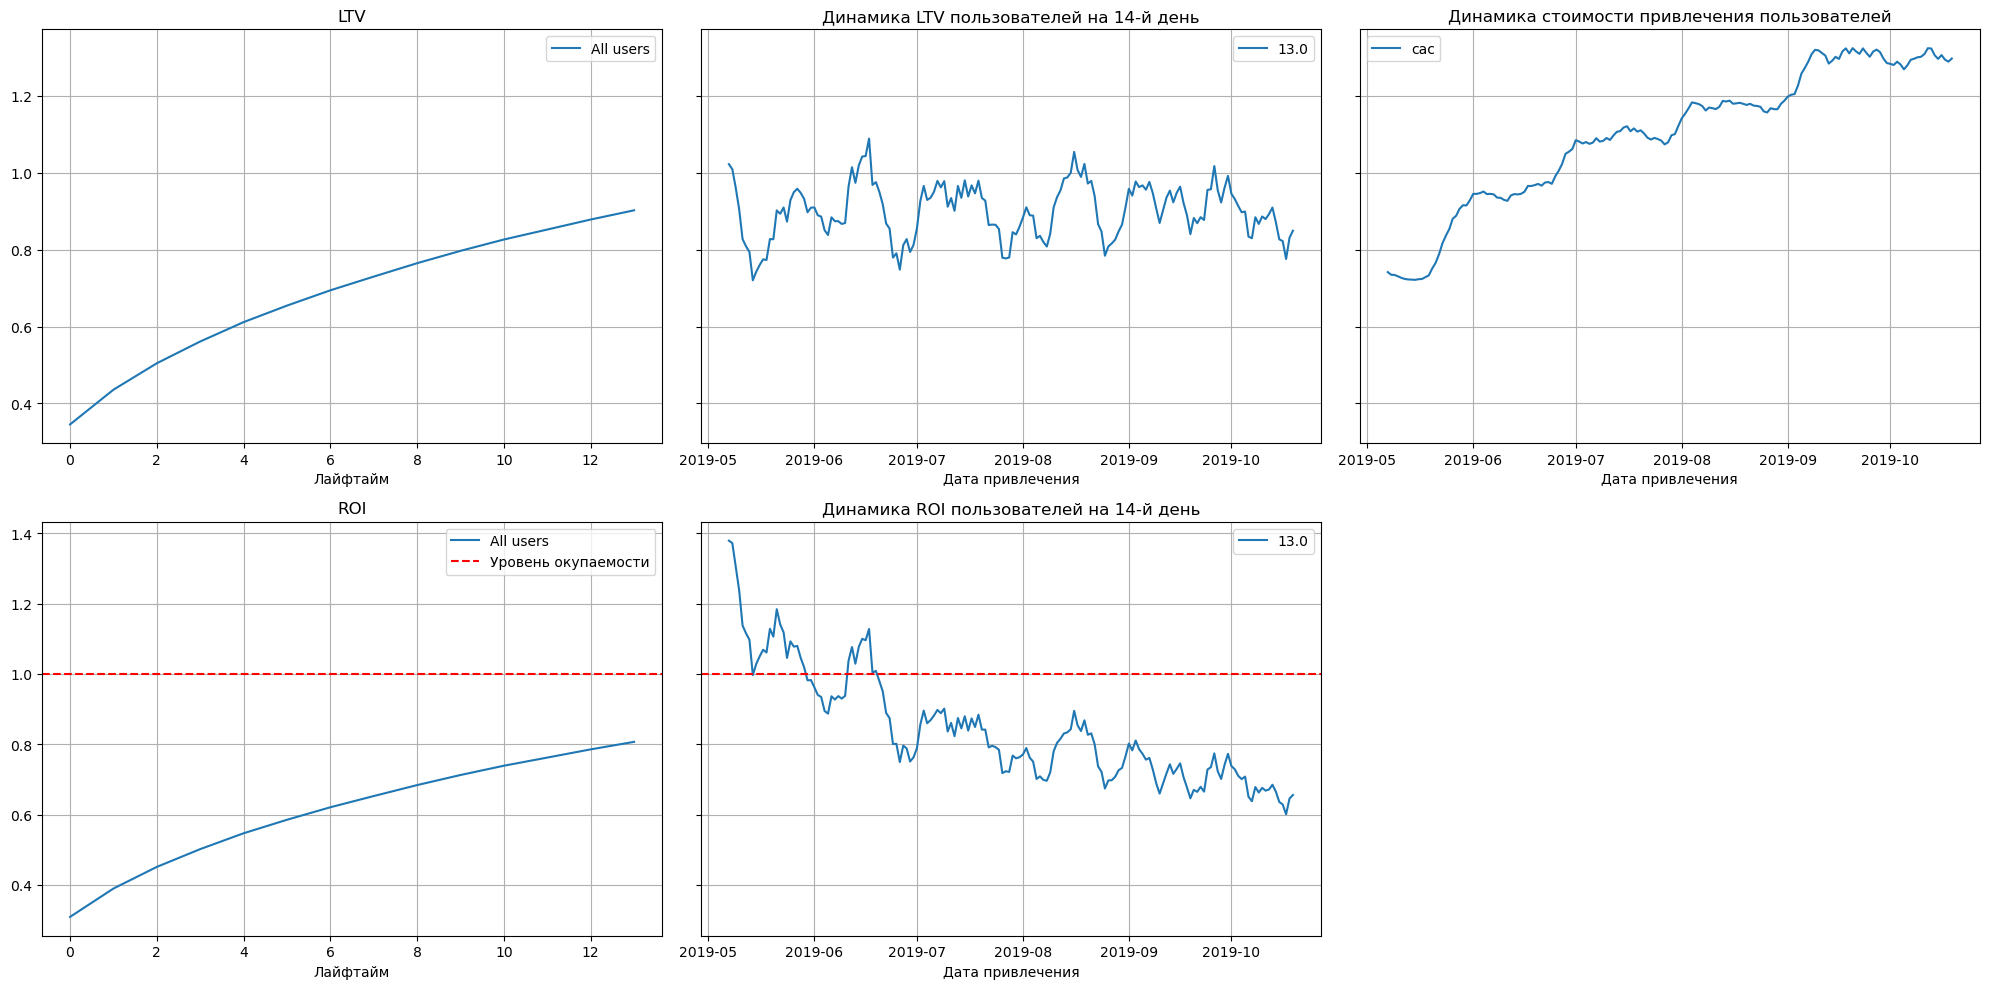

In [27]:
# окупаемость
profiles_whithout_organic = profiles.query('channel != "organic"')

observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_whithout_organic, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод: ROI не доходит до уровня окупаемости. Составляет 80% к 14 дню.
Динамика стоимости привлечения пользователей имеет восходящий тренд.**
___

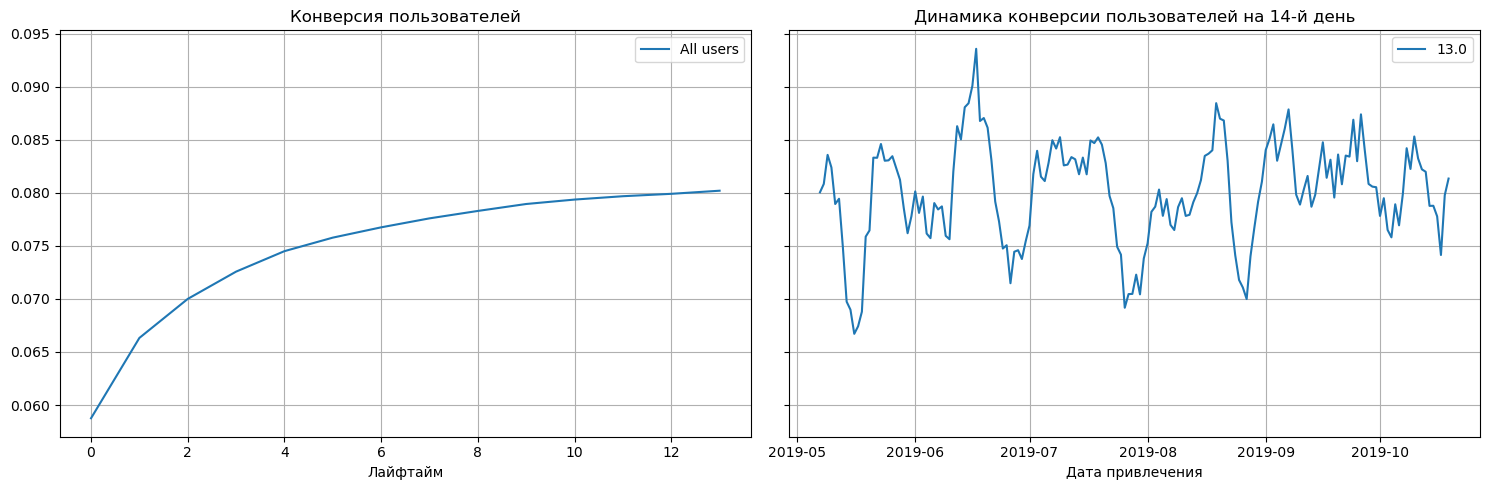

In [28]:
# конверсия
dimensions = []

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_whithout_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод: Конверсия не снижается за все 14 дней.**
___

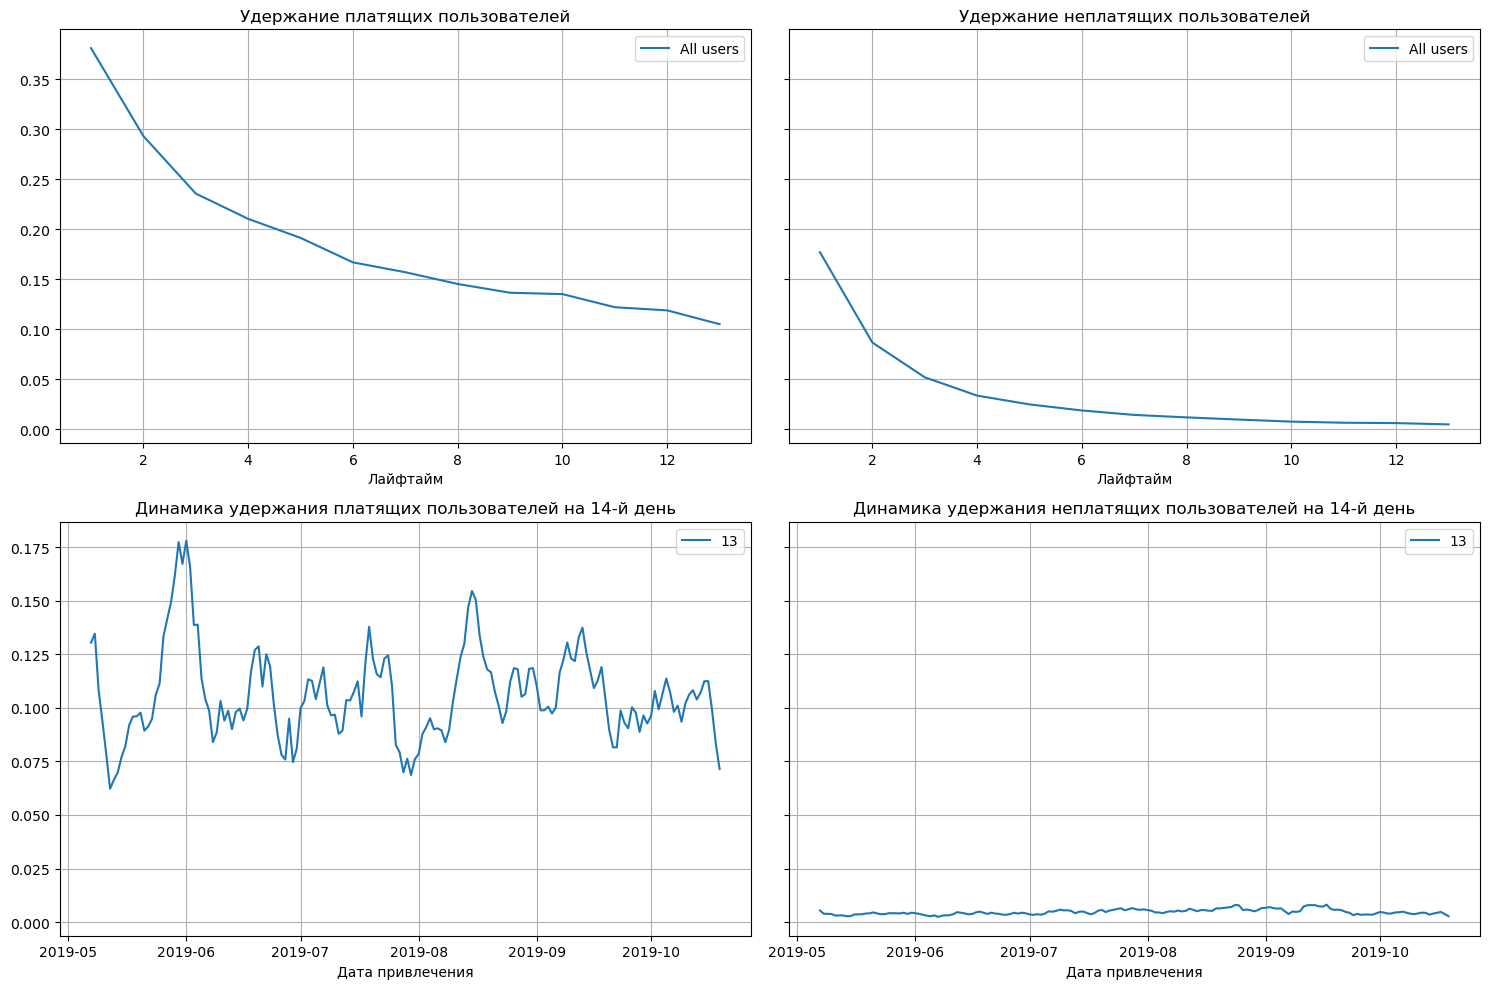

In [29]:
# удержание
dimensions=[]

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_whithout_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод: Удержание платящих пользователей выше в сравнении с не платящими пользователями.**
___

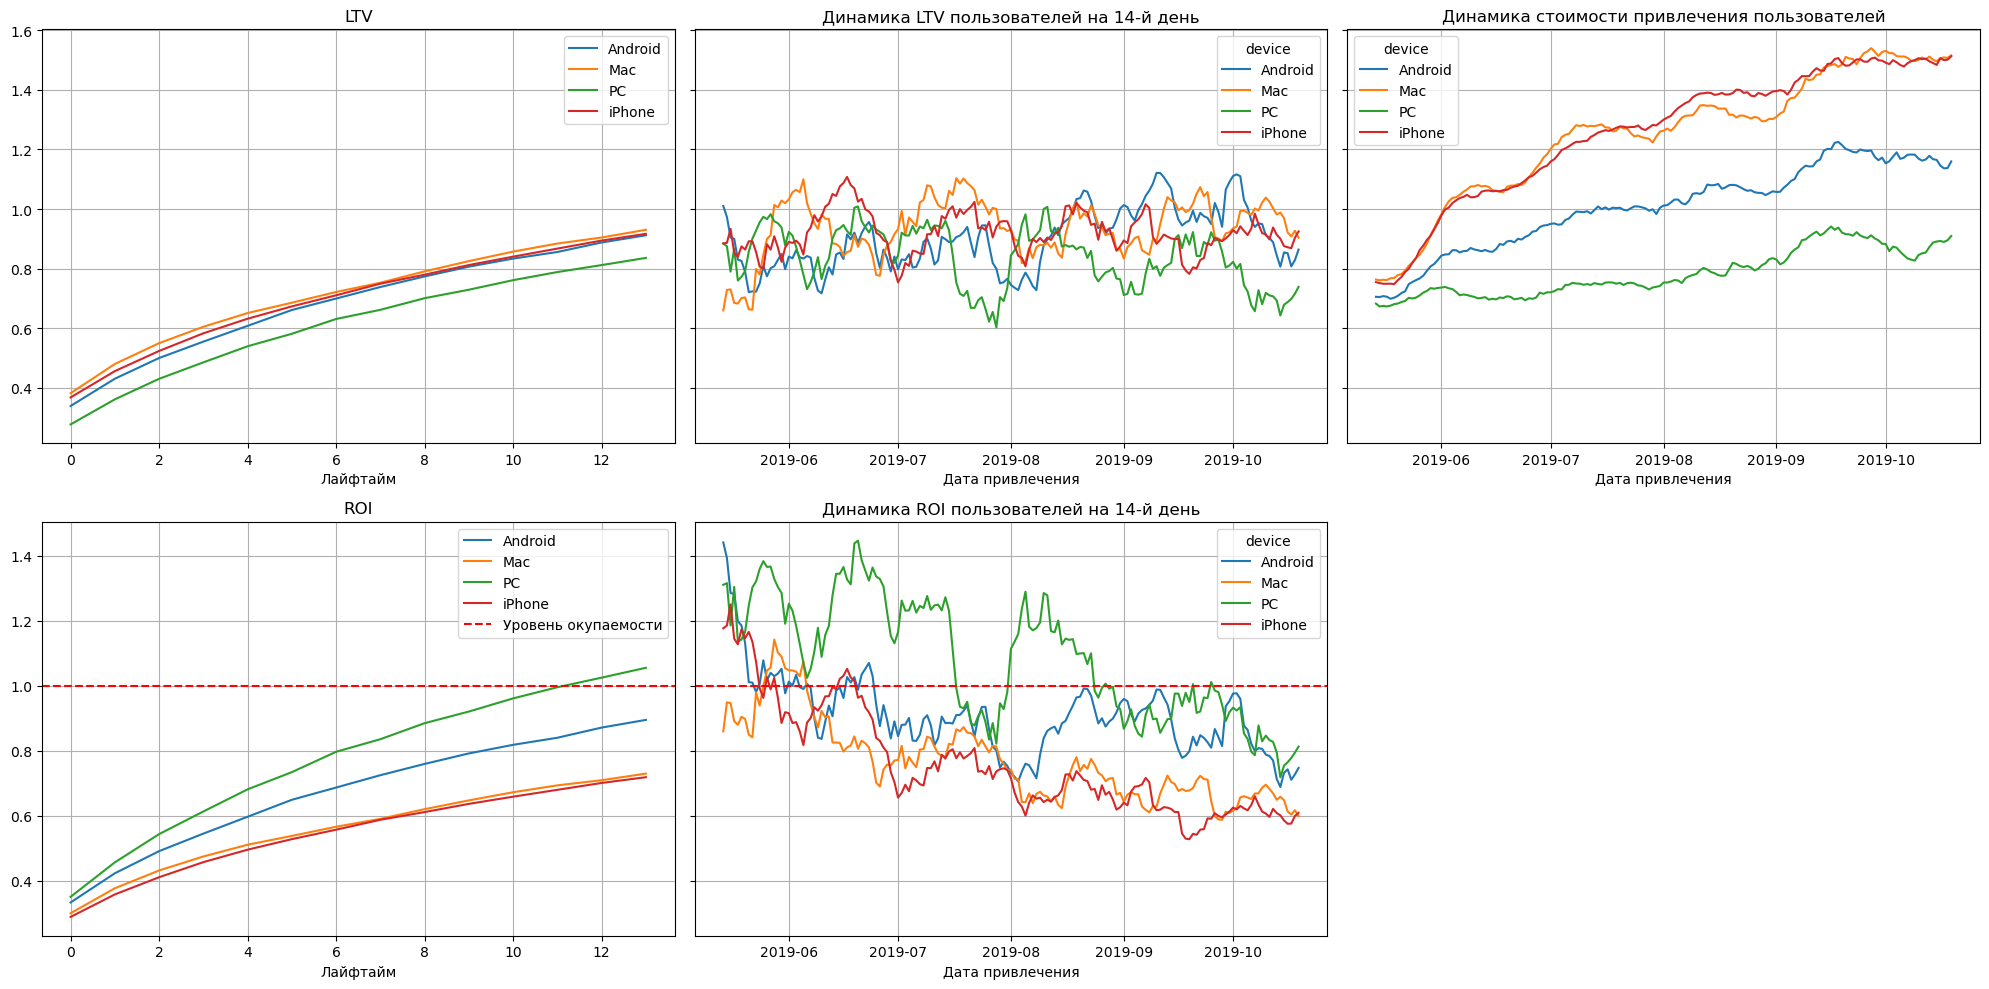

In [30]:
# окупаемость рекламы с разбивкой по устройствам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_whithout_organic, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод: Рекламная компания окупилась для пользователей PC.
Стоимость привлечения пользователей Mac и iPhone оказалась выше стоимости привлечения пользователей других платформ.**
___

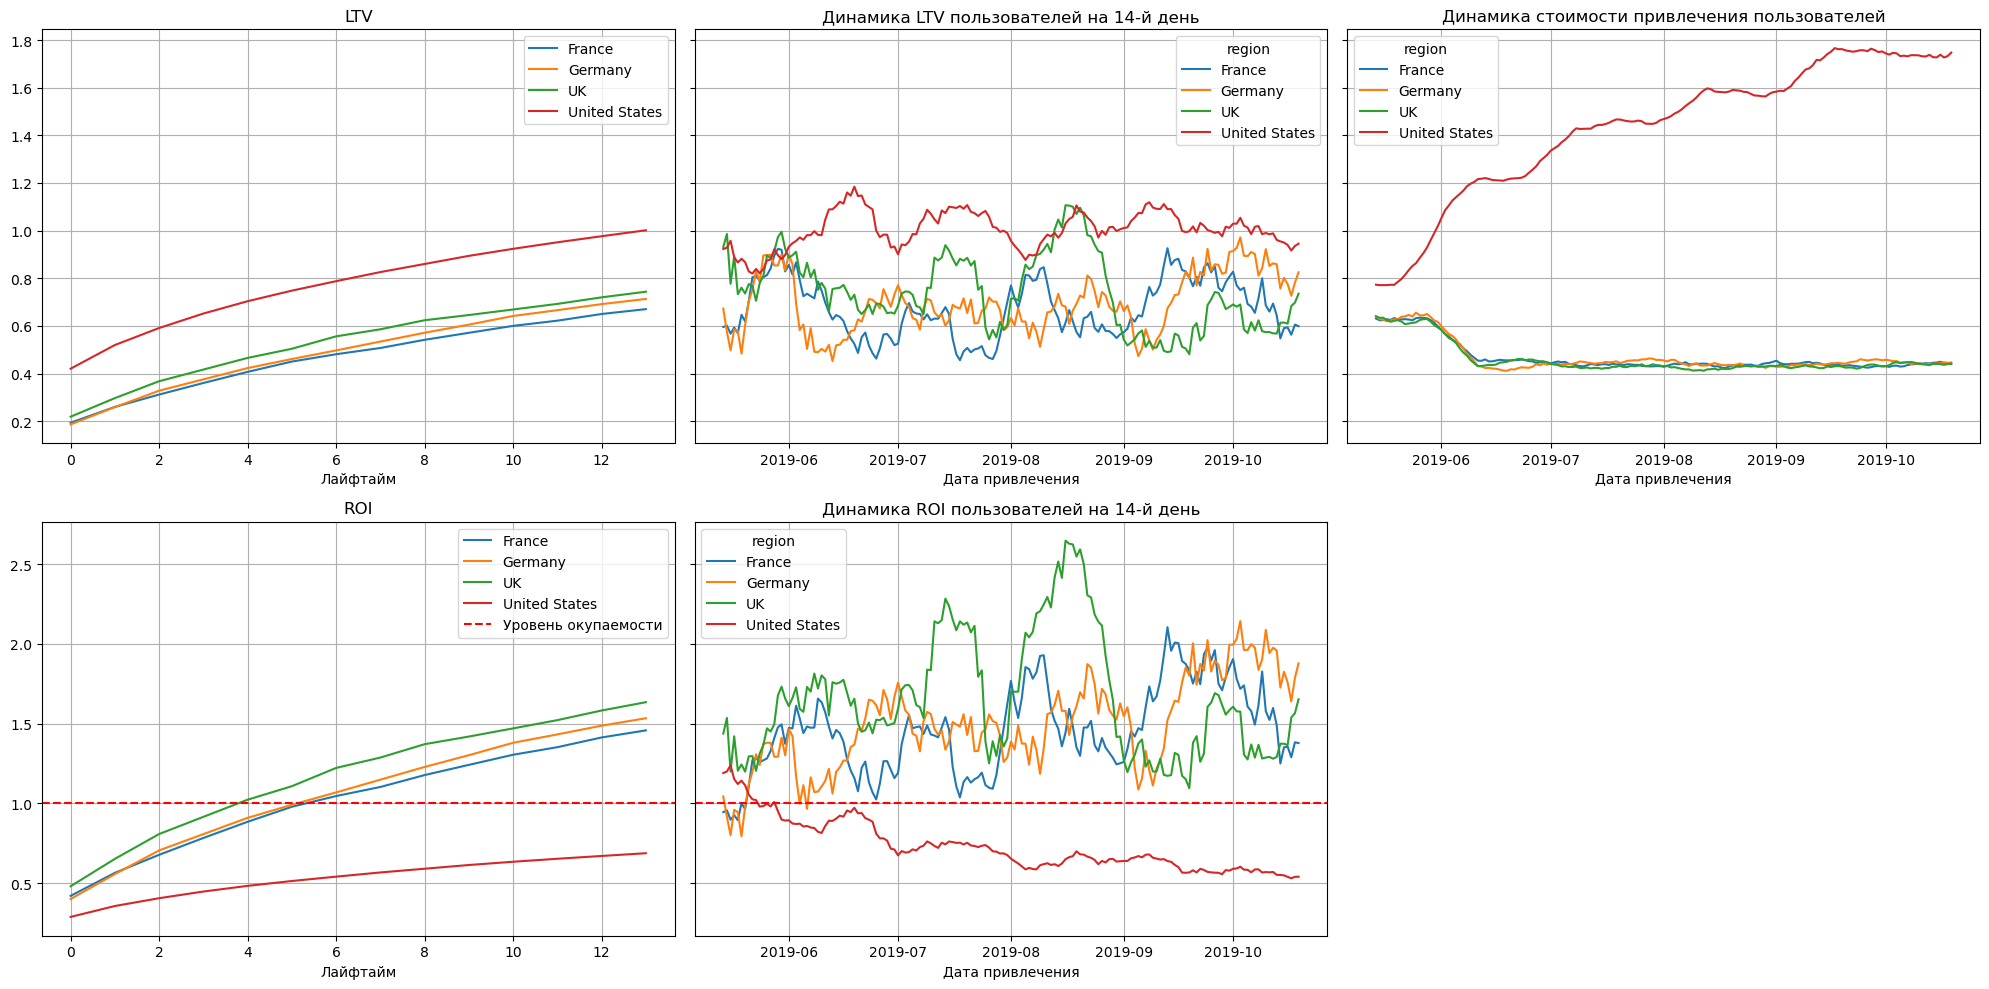

In [31]:
# окупаемость рекламы с разбивкой по странам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_whithout_organic, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод: Показатель Lifetime value стабильно растет.
Динамика стоимости привлечения пользователей из США выше показателей других стран.
Однако динамика ROI по США находится ниже уровня окупаемости.**
___

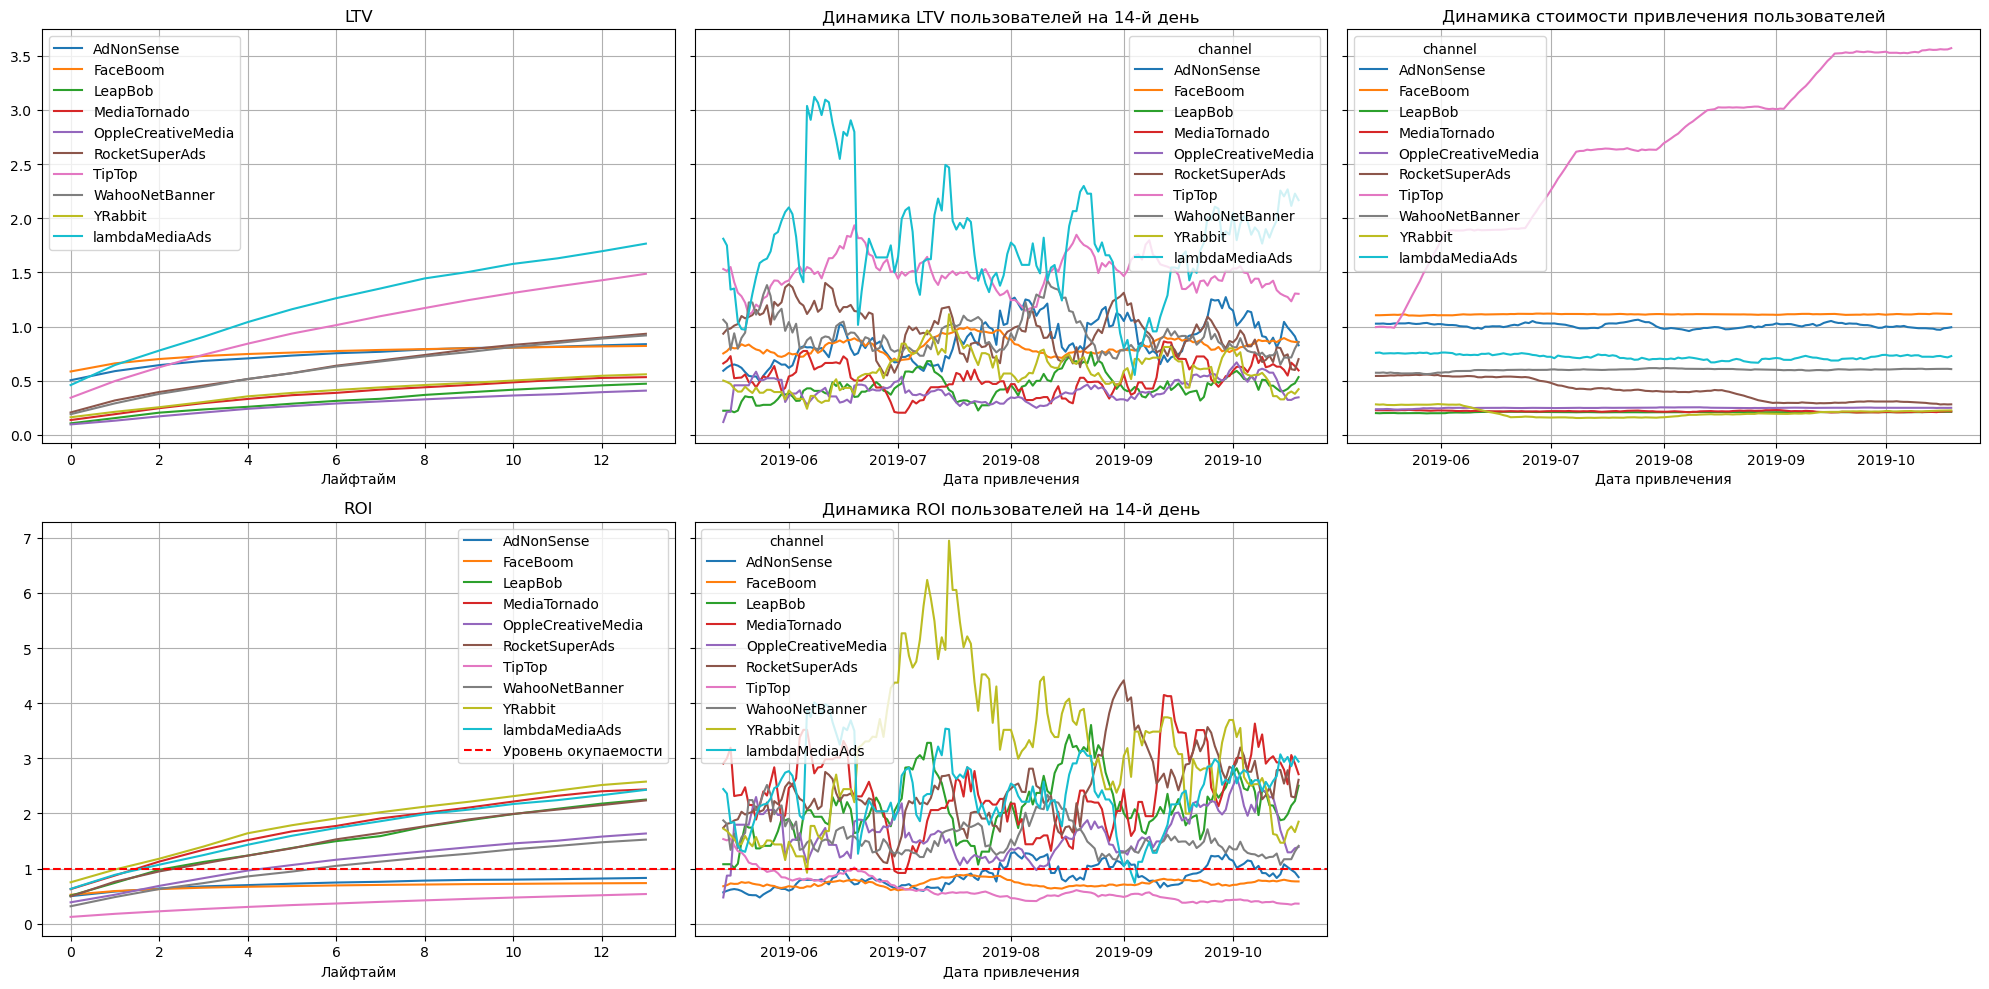

In [32]:
# окупаемость рекламы с разбивкой по рекламным каналам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_whithout_organic, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод: Затраты на рекламу не окупились для каналов Faceboom, AdNonSense и TipTop. Вероятно на это повлияла высокая стоимость привлечения пользователей у этих каналов, особенно у канала TipTop.**
___

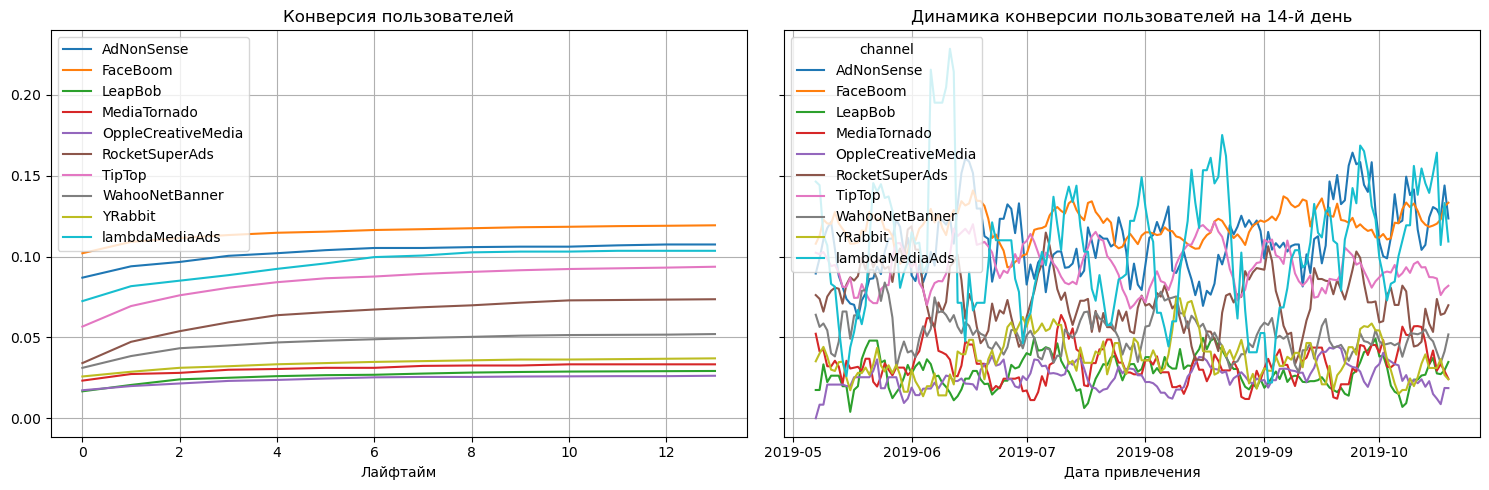

In [33]:
# конверсия с разбивкой по каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_whithout_organic, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод: Наибольшей конверсией пользователей обладает канал FaceBoom.**

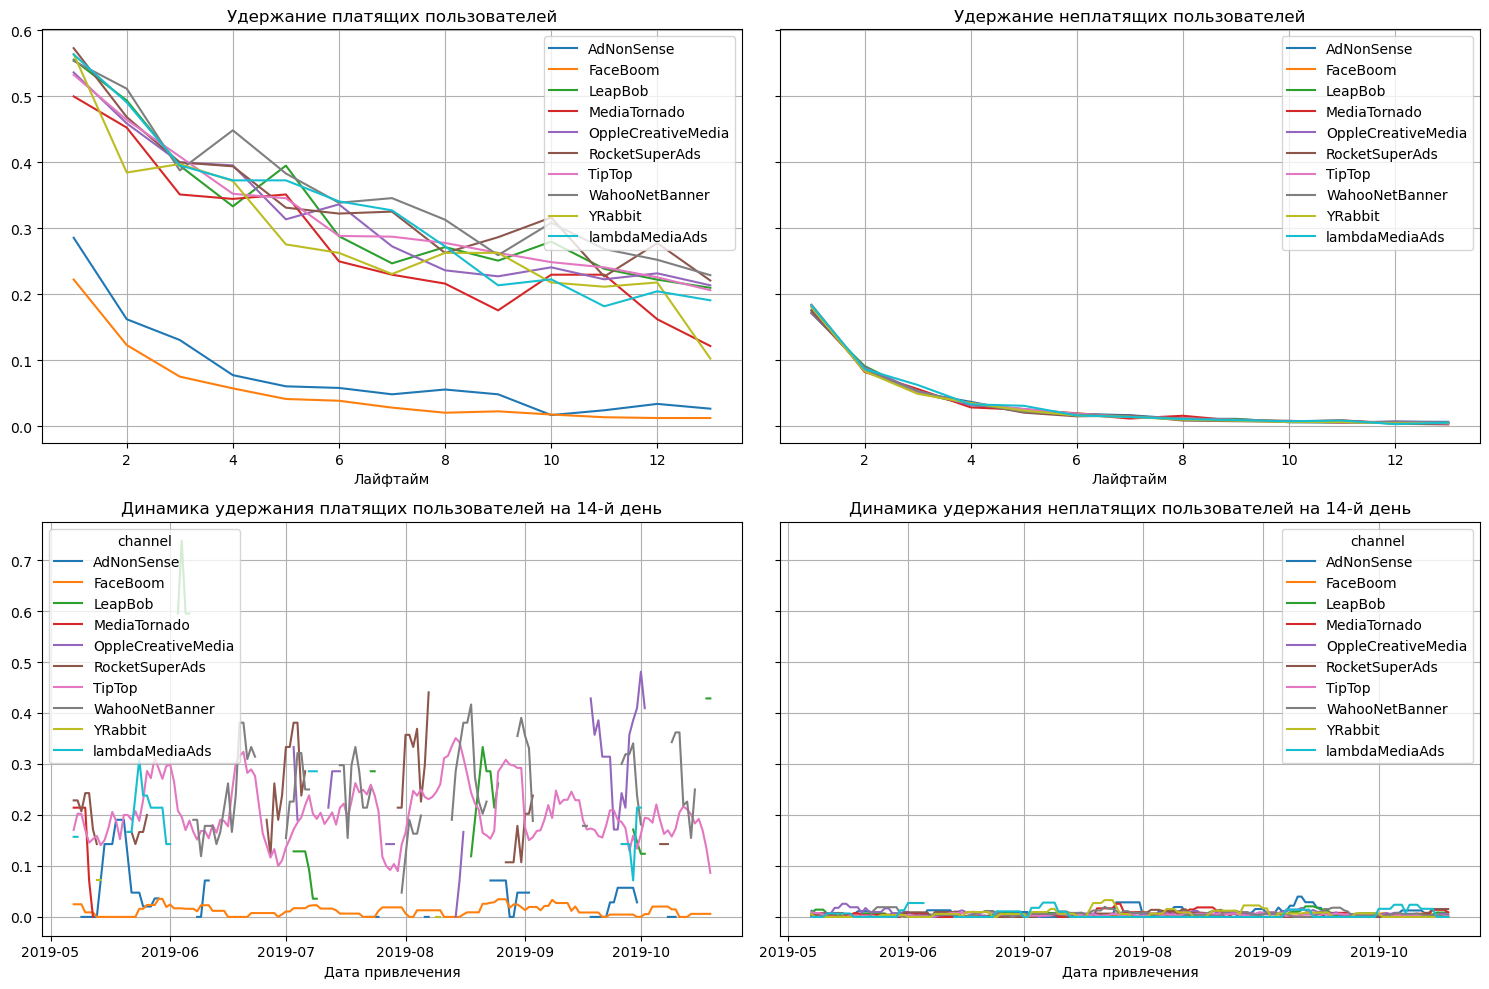

In [34]:
# удержание с разбивкой по каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_whithout_organic, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод: Каналы с наибольшей конверсией FaceBoom и AdNonSense имеют низкое удержание платящих пользователей.**

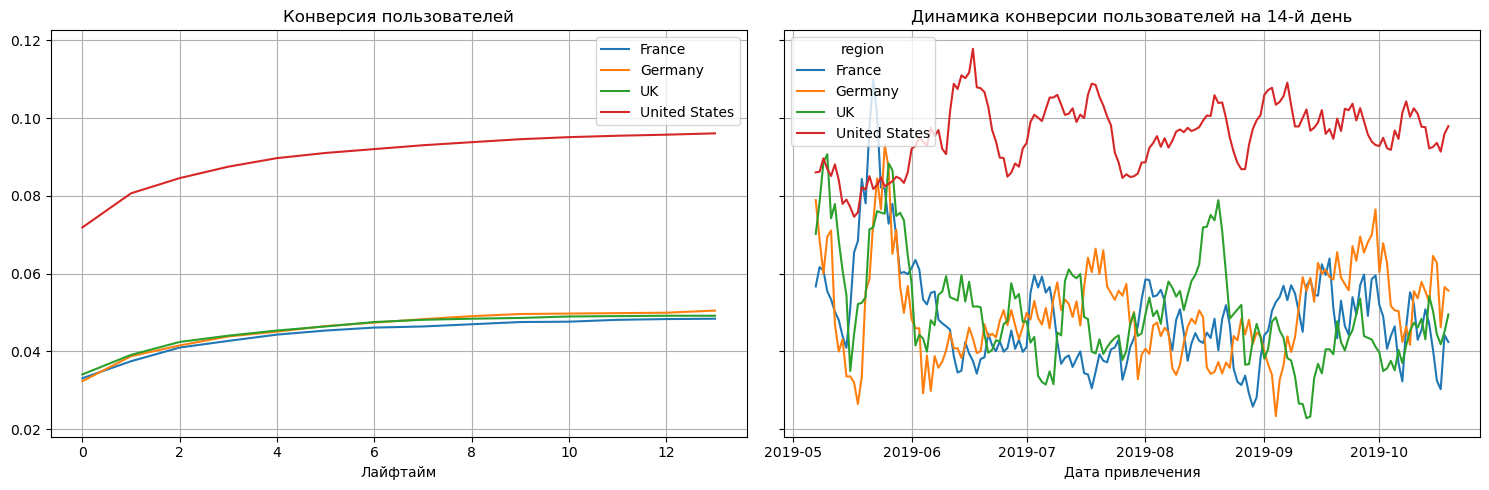

In [35]:
# конверсия с разбивкой по регионам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_whithout_organic, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод: Отмечается высокая конверсия пользователей в США.**

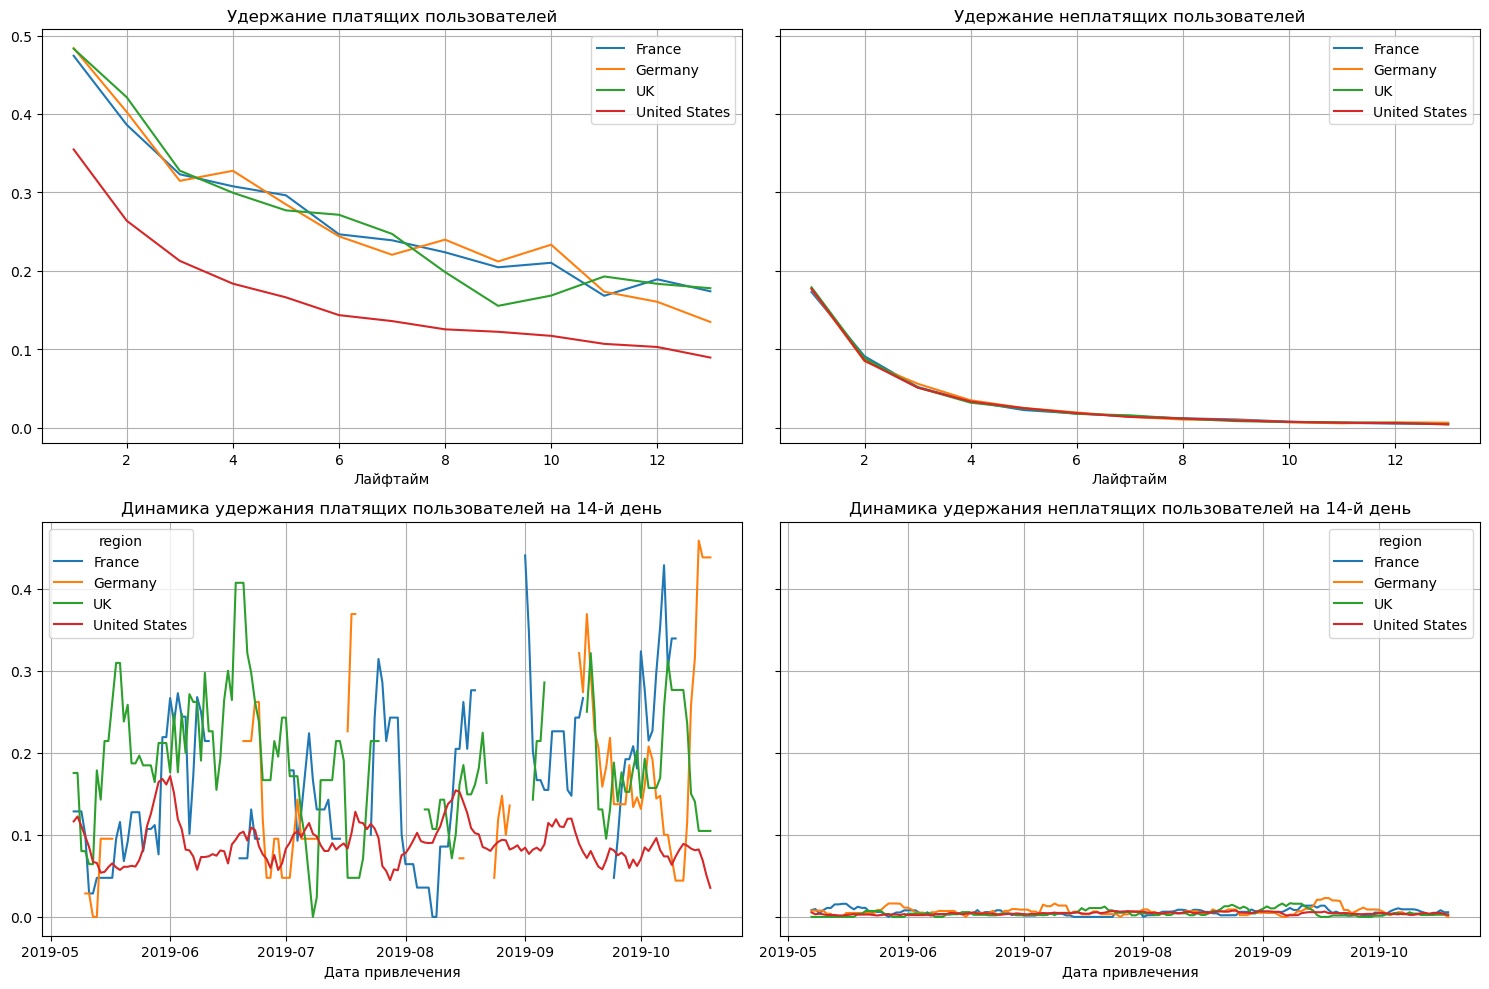

In [36]:
# удержание с разбивкой по регионам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_whithout_organic, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод: Выделяется низкое удержание платящих пользователей в США.** 

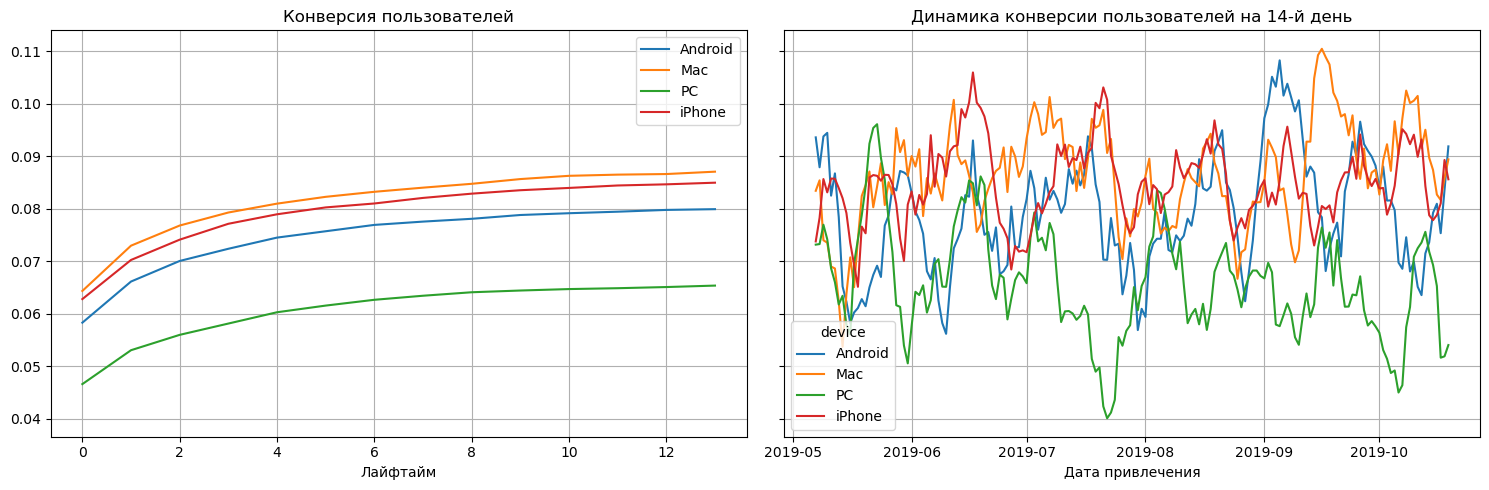

In [37]:
# конверсия с разбивкой по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_whithout_organic, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод: Конверсия пользователуй PC ниже конверсии пользователей других платформ.**

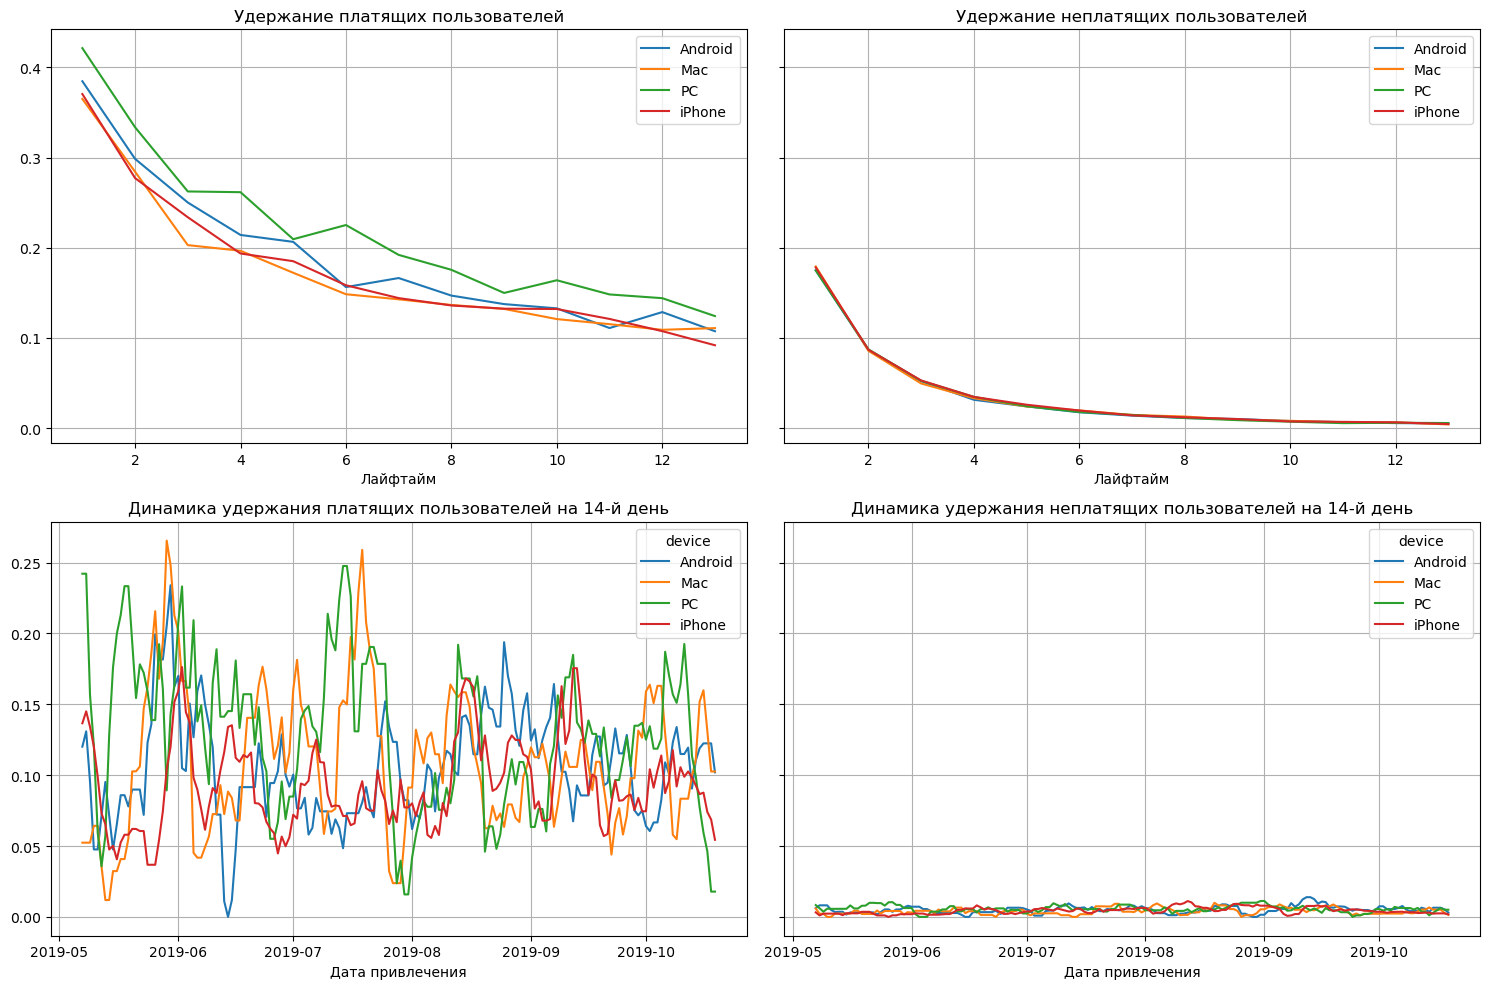

In [38]:
# удержание с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_whithout_organic, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод: Удержание платящих ползователей выше у PC. Удержание платящих пользователей IPhone и Mac примерно на одном уровне. Удержание у неплатящих пользователей по всем платформам одинаковое, линии сходятся в одну.**

**Проведя анализ графиков делаем вывод, что в целом реклама направленная на привлечение пользователей не окупает себя.
Окупаемость всех каналов привлечения выходит на уровень восьмидесяти процентов к четырнадцатому дню LTV.
Привлечение пользователей на платформах Mac и iPhone снижают окупаемость привлечения. Это видно из динамики стоимости привлечения пользователей этих платформ. Показатель ROI на четырнадцатый день выходит на показатель семьдесят процентов.
Динамика стоимости привлечения пользователей из США выше показателей других стран. Так же динамика ROI по США находится ниже уровня окупаемости, достигает семидесяти процентов.
Низкая окупоемость в США вероятно связана с большими затратыми привлечения пользователей Mac и iPhone. В совокупности пользователей Mac и iPhone чуть более половины всех пользователей всех полатформ. Пользователи Android и PC имеют более высокую окупаемость. Пользователей из Соединенных Штатов 100 тыс., что составляет 2/3 от всех пользователей, ROI пользователей из этой страны около семидесяти процентов, что негативно влияет на общий ROI. 
Промежуточная рекомендация состоит в том, что бы перераспределить затраты на рекламу для привлечения пользователей на другие страны с показателем окупаемости выше ста процентов.**
___

## Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

В ходе анализа были загружены и изучены данные. Приведены к единообразию названия колонок в таблицах. Была вополнена проверка на пропуски данных и дубликаты. Изменены типы данных. Заданы функции для расчета и анализа LTV, ROI, удержания и конверсии.

Был составлен портрет пользователей:

    Наибольшее количество пользователей привлекается из США: 100 тыс. пользователей. Также привлекаются пользователи из Великобритании (17575), Франции (17450) и Германии (14981). Минимальная и максимальная даты привлечения пользователей 2019-05-01 и 2019-10-31 соответственно. Самым популярным платформами у привлекаемых пользователей является iPhone (54479), остальные платформы (Mac, Android, PC) имеют примерно равные доли (в количестве около 30 тыс.). Наибольшее количество платящих пользователей приходит из канала FaceBoom.
    
Общая сумма расходов на рекламу $105497.Большая часть расходов на рекламу относилась к каналам привлечения TipTop и FaceBoom. Затраты только на эти два канала составляют 82% от общих расходов на рекламу. Что делает стоимость привлечения пользователей очень высокой.
    
Обшая окупаемость рекламы выходит на 80% на 14 день. Динамика стоимости привлечения пользователей Mac и iPhone высока. ROI пользователей этих устройств не достигает 1 на 14 день. Динамика стоимости привлечения пользователей из США высока. ROI пользователей из этой страны едва достигает 70% на 14 день. Динамика стоимости привлечения пользователей через рекламную сеть TipTop высока. ROI пользователей, привлеченных каналом привлечения также не достигает 1 и имеет самый низкий уровень из всех рекламных сетей.

Рекомендация для отдела маркетинга перераспределить затраты на рекламу для привлечения пользователей на другие страны с показателем окупаемости выше ста процентов.\
Пользователи из США имеют самую высокую долю платящих пользователей, однако привлечение этих пользователей обходится дорого. Стоит сократить привлечение пользователей из США и перенаправить рекламный бюджет на привлечении пользователей из Германии, Франции и Великобритании. Тоже самое справедливо и для пользователей Mac и iPhone: доля платящих высока, но высока так же и стоимость привлечения. Рекламные сети TipTop и FaceBoom, на которые расходуется большая часть средств хоть и приносят высокую долю платящих пользователй, в то же время обладают наиболее высоким САС среди всех рекламных сетей. Стоит рассмотреть другие сети: например lambdaMediaAds, MediaTornado и YRabbit обладают самой низкой стоимостью привлечения пользователя и самым высокоим ROI.